In [1]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
import qiskit.quantum_info as qi

In [2]:
from qiskit import IBMQ
from IBM_Q import API_IBM

IBMQ.save_account(API_IBM, overwrite=True)


IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-utokyo', group='internal', project='qc2021s')>]

In [3]:
IBMQ.providers() 

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-utokyo', group='internal', project='qc2021s')>]

In [4]:
provider = IBMQ.get_provider(hub='ibm-q-utokyo')

In [1]:
backend = provider.get_backend('ibmq_manila')

NameError: name 'provider' is not defined

In [47]:
# provider.backends('ibmq_sydney')

In [115]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

In [116]:
u_circuit = QuantumCircuit(q,c, name='teleportation')


theta = Parameter('θ')
phi = Parameter('φ')
psy = Parameter('ψ')


u_circuit.u(theta,phi,psy,q[0])
u_circuit.barrier(q)

qc = QuantumCircuit(q,c, name='teleportation')


qc.h(q[1])
qc.cnot(q[1],q[2])
qc.x(q[1])
qc.barrier(q)

qc.cnot(q[0],q[1])
qc.h(q[0])
qc.barrier(q)

qc.measure([q[0],q[1]],[c[0],c[1]])
qc.barrier(q)



CircuitError: 'c_if must be used with a classical register'

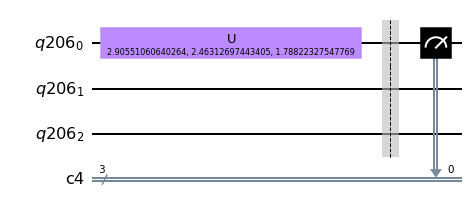

In [108]:
T = np.random.rand(3) * np.pi
parameters = {theta:T[0], phi:T[1], psy:T[2]}
u_circuit_ = u_circuit.bind_parameters(parameters)
u_circuit_.measure(q[0],c[0])
u_circuit_.draw('mpl')

In [70]:
from qiskit.compiler import transpile, assemble
mapped_circuit = transpile(u_circuit_, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=2**13)
job2 = backend.run(qobj)

In [75]:
from qiskit.providers.jobstatus import JOB_FINAL_STATES
import time

start_time = time.time()
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job.queue_position()}')
    time.sleep(10)
    job_status = job.status()

result = job.result()
print(result.get_counts())

{'00': 4625, '01': 3567}


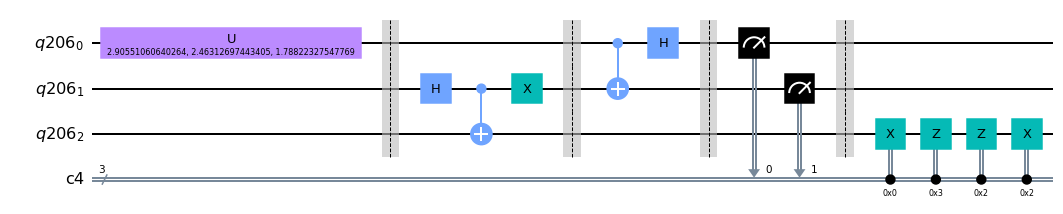

In [112]:
original_qc = u_circuit.combine(qc)

original_qc_ = original_qc.bind_parameters(parameters)
original_qc_.draw('mpl')

In [110]:
original_qc_.measure(q[2],c[2])

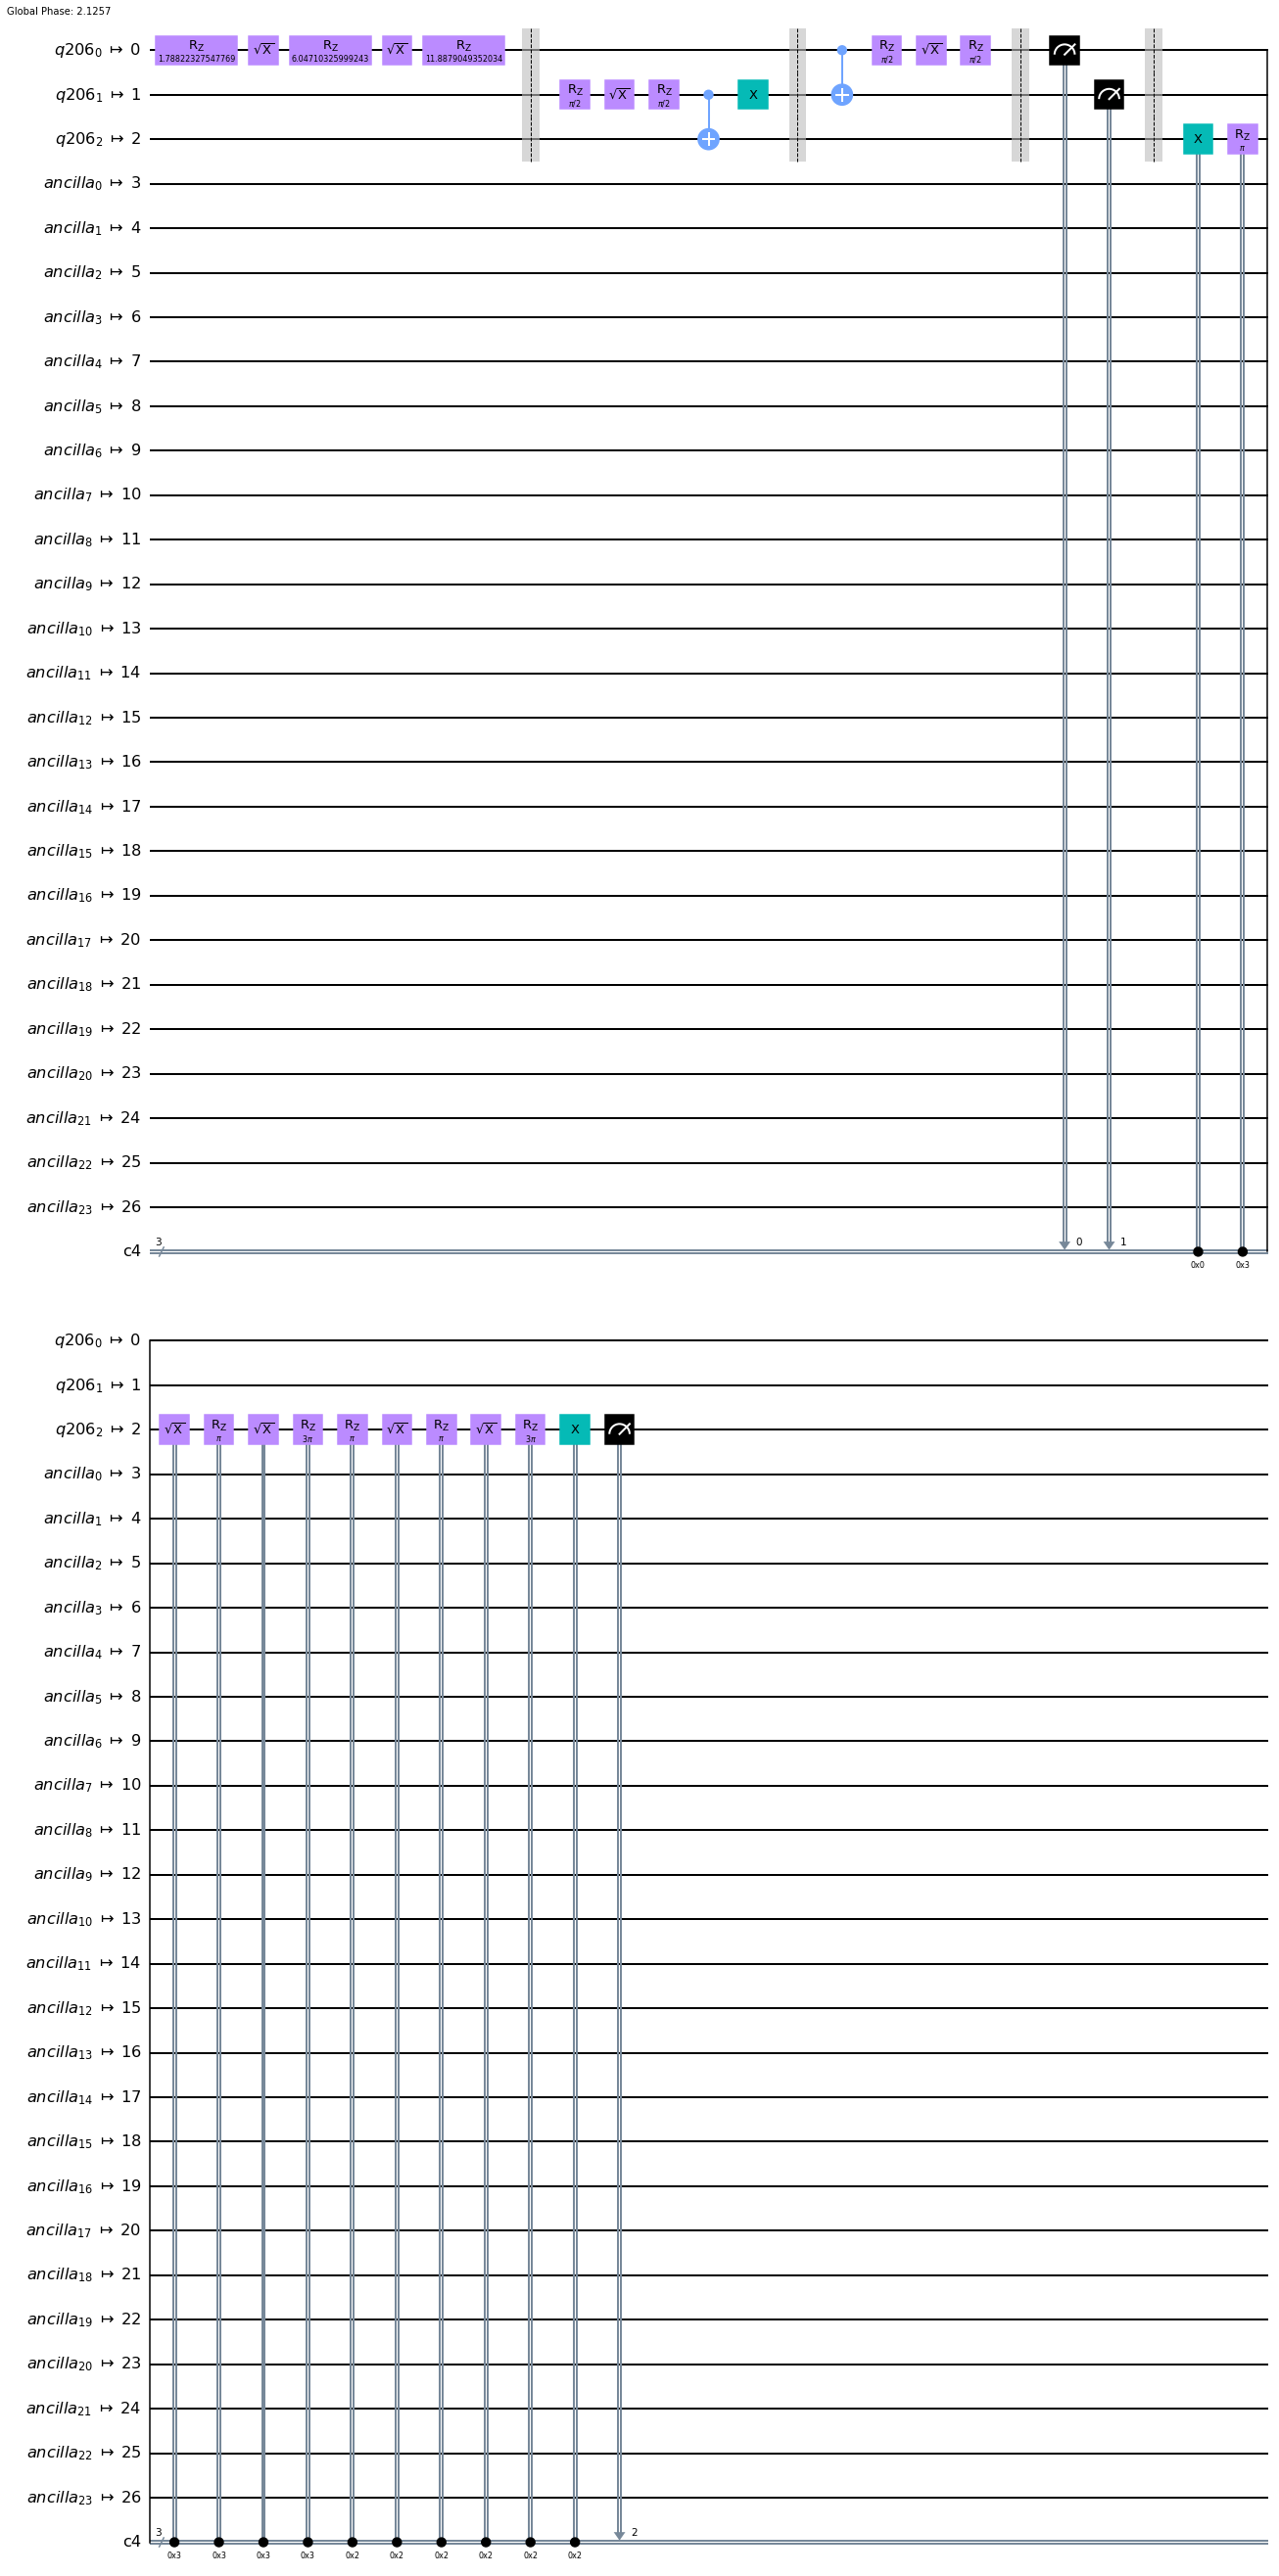

In [111]:
mapped_circuit = transpile(original_qc_, backend=backend)
mapped_circuit.draw('mpl')

In [113]:
qobj = assemble(mapped_circuit, backend=backend, shots=2**13)
job = backend.run(qobj)

In [114]:
start_time = time.time()
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job.queue_position()}')
    time.sleep(10)
    job_status = job.status()

result = job.result()
print(result.get_counts())

Status @ 1 s: QUEUED, est. queue position: 8


IBMQJobFailureError: 'Unable to retrieve result for job 60a51c3907f093097f34c481. Job has failed: Instruction bfunc is not supported. Error code: 7001.'

In [94]:
job.status()

<JobStatus.ERROR: 'job incurred error'>